In [1]:
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

In [3]:
file = 'data.csv'
data = pd.read_csv(file)

data.head()

,Carimbo de data/hora,Anos de Experiência,Tamanho Médio da Equipe,Tempo de Mercado da Startup,Cargo,Fonte de Requisitos,Análise de Documentos,Brainstorming,Entrevistas,Observação,...,Ciclos de Feedback,Testes de Usuário,Repetição da Descoberta,Esse processo é feito mais de uma vez?,Frequência de solicitações de mudança,Origem das solicitações de mudança,Metodologia de gerenciamento,Criterios de análise de solicitação de mudança,Consequências da solicitação de mudanças,Comentários
0,09/11/2023 11:29:59,18,3,5,CTO,"Clientes, Time de Marketing, Time de Produto",Sempre,Frequentemente,Sempre,Às Vezes,...,Sempre,Às Vezes,Frequentemente,Sim,Sempre,"Desenvolvedores, Product Owners, Stakeholders,...","Kanban, Scrum",Adequação ao contrato em relação ao prazo e cu...,"Análise de Impacto, Avaliação de Risco, Implem...",Foquei as respostas nos produtos de software q...
1,23/11/2023 09:35:08,3,13,3,Product Owner,"Usuários, Time de Desenvolvimento, Time de Des...",Sempre,Sempre,Frequentemente,Sempre,...,Frequentemente,Frequentemente,Frequentemente,Sim,Raramente,Product Owners,"Kanban, Scrum","Não há critérios específicos, pois raramente a...",Avaliação de Risco,NaN
2,23/11/2023 09:39:45,2,4,2,Product Manager,Stakeholders,Às Vezes,Sempre,Frequentemente,Frequentemente,...,Sempre,Sempre,Sempre,Sim,Raramente,"Stakeholders, Usuários Finais",Scrum,Mudança no negócio,"Revisão do Projeto, Revisão da Sprint",NaN
3,23/11/2023 10:06:54,3,5,2,Product Manager,Diretoria,Sempre,Às Vezes,Frequentemente,Sempre,...,Frequentemente,Às Vezes,Às Vezes,Às vezes,Sempre,Stakeholders,Scrum,Análise de indicadores,"Análise de Impacto, Revisão da Sprint, Impleme...",NaN
4,28/11/2023 09:43:29,20,20,60,Analista de Sistemas,"Time de Operações, Time Comercial, Time Financ...",Às Vezes,Frequentemente,Sempre,Frequentemente,...,Frequentemente,Às Vezes,Às Vezes,Às vezes,Frequentemente,Desenvolvedores,Scrum,"tempo, custo e viabilidade","Análise de Impacto, Avaliação de Risco, Revisã...",A mudanças não necessárias e precisam ser aval...


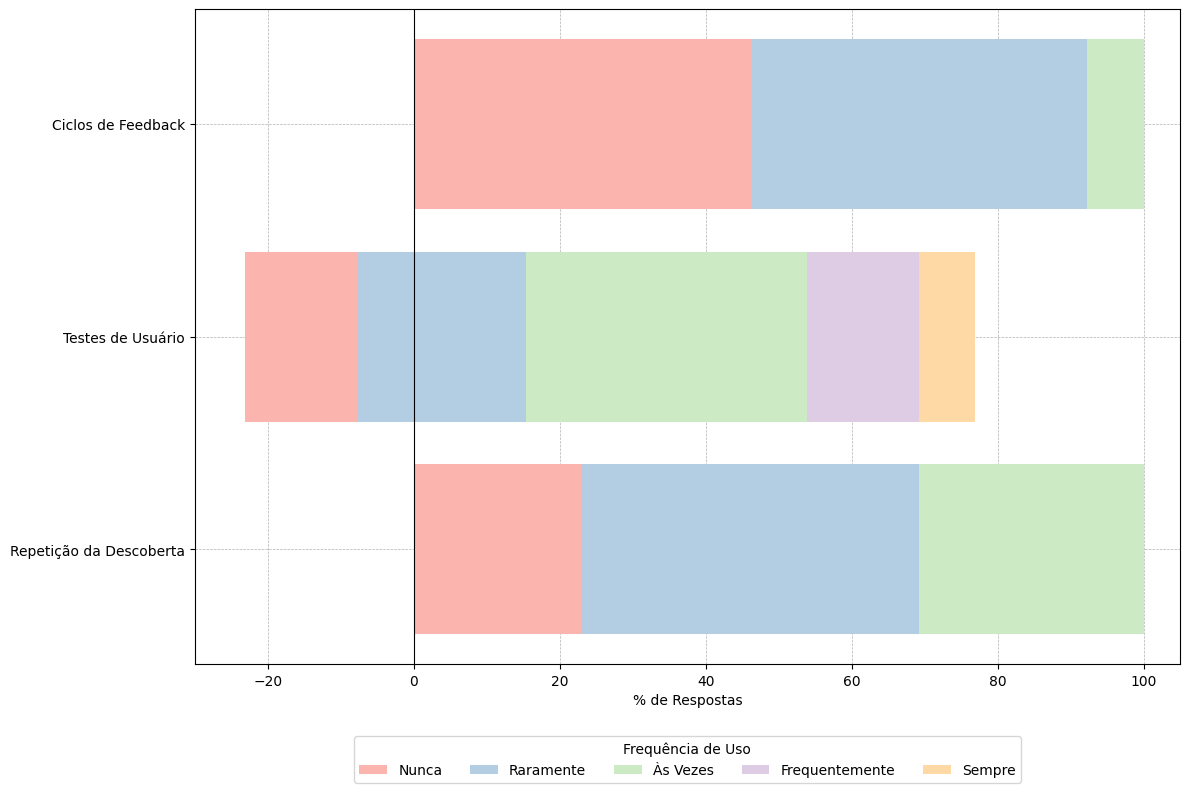

In [4]:
colunas_interesse = ['Ciclos de Feedback',
                     'Testes de Usuário',
                     'Repetição da Descoberta']
data_subset = data[colunas_interesse]

# Contando as ocorrências de cada categoria de resposta corretamente
count_data = data_subset.apply(lambda x: x.value_counts()).fillna(0).T

# Calculando porcentagens
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Definindo as cores pastel para o gráfico
pastel_palette = sns.color_palette("Pastel1", 5)

# Preparando os dados para plotagem divergente
percentage_data['Sum_Negative'] = percentage_data.get('Nunca', 0) + percentage_data.get('Raramente', 0)
percentage_data['Sum_Positive'] = percentage_data.get('Frequentemente', 0) + percentage_data.get('Sempre', 0)
percentage_data['Left'] = -percentage_data['Sum_Negative']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Armazenando handles para a legenda
bars = []

# Plotando cada categoria ajustando as posições
for i, category in enumerate(['Nunca', 'Raramente', 'Às Vezes', 'Frequentemente', 'Sempre'][::-1]):
    bar = ax.barh(percentage_data.index, percentage_data[category], left=percentage_data['Left'], color=pastel_palette[i])
    bars.append(bar)
    percentage_data['Left'] += percentage_data[category]

# Personalizando o gráfico
ax.axvline(0, color='black', linewidth=0.8)  # Linha vertical em zero para referência
ax.set(xlim=[-30, 105], xlabel='% de Respostas')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)  # Coloca a grade atrás das barras

plt.gca().invert_yaxis()  # Inverter o eixo y para ter a primeira entrada no topo

labels = ['Nunca', 'Raramente', 'Às Vezes', 'Frequentemente', 'Sempre']
ax.legend([b[0] for b in bars], labels, title="Frequência de Uso", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

plt.tight_layout()
plt.savefig('plots/q2/divergencia_alinhamento.png', transparent=True)
plt.show()